In [ ]:
# load and plot images
from os import listdir
from numpy import asarray
from PIL import Image
from matplotlib import pyplot

# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

# load images and extract all images in a directory
def load_all_images(directory, n_images):
    images = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory + filename)
        # store
        images.append(pixels)
        # stop once we have enough
        if len(images) >= n_images:
            break
    return asarray(images)

# plot a list of loaded images
def plot_images(images, n):
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
    pyplot.show()

# directory that contains all images
directory = 'dataset/Scene_1/scenes/'
# load and extract all images
images = load_all_images(directory, 100)
print('Loaded: ', images.shape)
# plot images
plot_images(images, 5)

1 (80, 80, 3)
2 (80, 80, 3)
3 (80, 80, 3)
4 (80, 80, 3)
5 (80, 80, 3)
6 (80, 80, 3)
7 (80, 80, 3)
8 (80, 80, 3)
9 (80, 80, 3)
10 (80, 80, 3)
11 (80, 80, 3)
12 (80, 80, 3)
13 (80, 80, 3)
14 (80, 80, 3)
15 (80, 80, 3)
16 (80, 80, 3)
17 (80, 80, 3)
18 (80, 80, 3)
19 (80, 80, 3)
20 (80, 80, 3)
21 (80, 80, 3)
22 (80, 80, 3)
23 (80, 80, 3)
24 (80, 80, 3)
25 (80, 80, 3)
26 (80, 80, 3)
27 (80, 80, 3)
28 (80, 80, 3)
29 (80, 80, 3)
30 (80, 80, 3)
31 (80, 80, 3)
32 (80, 80, 3)
33 (80, 80, 3)
34 (80, 80, 3)
35 (80, 80, 3)
36 (80, 80, 3)
37 (80, 80, 3)
38 (80, 80, 3)
39 (80, 80, 3)
40 (80, 80, 3)
41 (80, 80, 3)
42 (80, 80, 3)
43 (80, 80, 3)
44 (80, 80, 3)
45 (80, 80, 3)
46 (80, 80, 3)
47 (80, 80, 3)
48 (80, 80, 3)
49 (80, 80, 3)
50 (80, 80, 3)
51 (80, 80, 3)
52 (80, 80, 3)
53 (80, 80, 3)
54 (80, 80, 3)
55 (80, 80, 3)
56 (80, 80, 3)
57 (80, 80, 3)
58 (80, 80, 3)
59 (80, 80, 3)
60 (80, 80, 3)
61 (80, 80, 3)
62 (80, 80, 3)
63 (80, 80, 3)
64 (80, 80, 3)
65 (80, 80, 3)
66 (80, 80, 3)
67 (80, 80, 3)
68 (

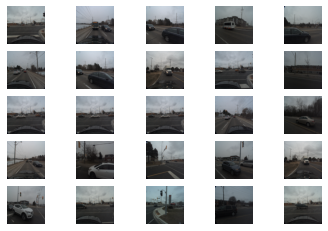

Loaded:  (200, 80, 80, 3)


In [79]:
# example of extracting and resizing images into a new dataset
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot

# load an image as an rgb numpy array
def load_image(filename, required_size=(40, 40)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    
    width, height = image.size
    if width < required_size[0] or height < required_size[1]:
        return []
    # convert to array
    pixels = asarray(image)
    return pixels

# plot a list of loaded images
def plot_images(images, n):
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
    pyplot.show()


# load images and resize all images to the required_size
def load_images(directory, n_images, required_size=(40, 40)):
    images = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory + filename)
        if len(pixels) == 0:
            continue
        # resize pixels to the model size
        image = Image.fromarray(pixels)
        image = image.resize(required_size)
        resized_image = asarray(image)
        if resized_image is None:
            continue            
        # store
        images.append(resized_image)
        print(len(images), resized_image.shape)        
        # stop once we have enough
        if len(images) >= n_images:
            break
    print(len(images))
    return asarray(images)

# directory that contains all images
directory = 'dataset/Scene_1/scenes/'
# load and extract all images
all_images = load_images(directory, 200)
plot_images(all_images, 5)
print('Loaded: ', all_images.shape)
# save in compressed format
savez_compressed('img_align_dataset.npz', all_images)

In [ ]:
# load the prepared dataset
from numpy import load
# load the dataset
data = load('img_align_dataset.npz')
images = data['arr_0']
print('Loaded: ', images.shape)

In [ ]:
# a gan for generating images
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint

from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(40,40,3)):
    model = Sequential()
    # normal
    model.add(Conv2D(128, (5,5), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
#     # downsample to 40x40
#     model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
    # downsample to 20x20
    model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 10x10
    model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 5x5
    model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 5x5 feature maps
    n_nodes = 128 * 10 * 5
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((10, 5, 128)))
    # upsample to 10x10
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
   
    # upsample to 20x20
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 40x40
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
#     # upsample to 80x80
#     model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
    # output layer 80x80x3
    model.add(Conv2D(3, (5,5), activation='tanh', padding='same'))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# load and prepare training images
def load_real_samples():
    # load the dataset
    data = load('img_align_dataset.npz')
    X = data['arr_0']
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    return X

# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

# create and save a plot of generated images
def save_plot(examples, epoch, n=10):
    # scale from [-1,1] to [0,1]
    examples = (examples + 1) / 2.0
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i])
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('&gt;Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    #g_model.compile(optimizer='adam', loss='binary_crossentropy')
    save_plot(x_fake, epoch)
    # save the generator model tile file
    filename = 'generator_model_%03d.h5' % (epoch+1)
    g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('&gt;%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

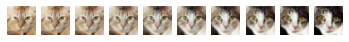

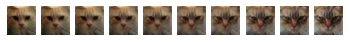

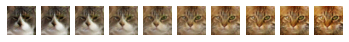

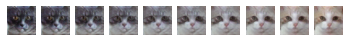

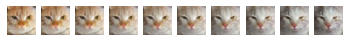

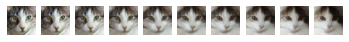

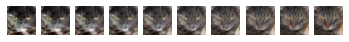

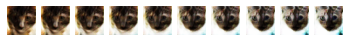

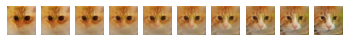

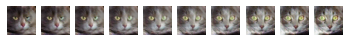

In [1]:
# example of interpolating between generated images
import numpy
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
from keras.models import load_model
from matplotlib import pyplot
from PIL import Image
import os
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

# create a plot of generated images
def plot_generated(examples, n, example_no):
    directory_path = 'samples/%02d' %(example_no)
    try: 
        os.mkdir(directory_path) 
    except: 
        print("", end="")
    # plot images
    for i in range(n):
         # define subplot
        #pyplot.subplot(1, n, 1 )
       
         # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i])
        
        filename = directory_path+'/e%03d.png' %(i)
        pyplot.savefig(filename)
    pyplot.close()
    
    # plot images
    for i in range(n):
        # define subplot
        pyplot.subplot(1, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :])
        
    pyplot.show()
    
#load model
model = load_model('generator_model_070.h5')
try: 
    os.mkdir('samples') 
except: 
    print("", end="")
for i in range(10):    
    # generate points in latent space
    pts = generate_latent_points(100, 2)
    # interpolate points in latent space
    interpolated = interpolate_points(pts[0], pts[1])
    # generate images
    X = model.predict(interpolated)
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    # plot the result
    plot_generated(X, len(interpolated), i)